## Assignment 1
### EP20BTECH11007
### Gowri Govindaraj

## Q1.

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import astropy
import astroML
from astropy.stats import median_absolute_deviation
from astroML.stats import sigmaG

In [10]:
dist = stats.norm(1.5,0.5)
rv = dist.rvs(1000)
p = dist.pdf(rv)

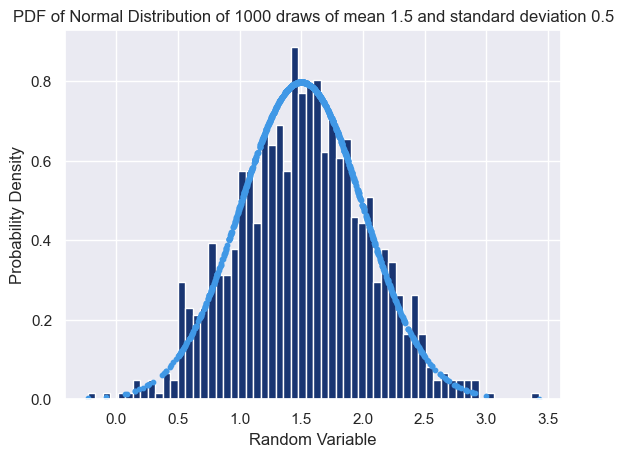

In [11]:
plt.hist(rv,bins=60,density=True,color='#193572')
plt.scatter(rv,p,s=10,color = "#4098E6")
plt.title("PDF of Normal Distribution of 1000 draws of mean 1.5 and standard deviation 0.5") 
plt.xlabel("Random Variable")
plt.ylabel("Probability Density")
plt.show()

In [13]:
print('Sample mean is: ', np.mean(rv))
print('Sample variance is: ', np.var(rv))
print('Skewnness is: ', stats.skew(rv))
print('Kurtosis is: ', stats.kurtosis(rv))
print('MAD is: ', median_absolute_deviation(rv))
print('\u03C3_G is: ', sigmaG(rv))

Sample mean is:  1.5069525063453986
Sample variance is:  0.285063818642596
Skewnness is:  0.014433649996624488
Kurtosis is:  -0.06476236319936479
MAD is:  0.3537505262091002
σ_G is:  0.5330710868159309


## Q2.

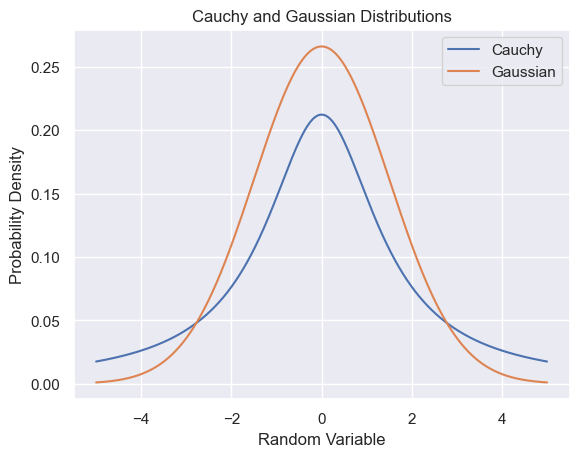

In [14]:
x = np.arange(-5, 5, 0.001)

#Plotting the Cauchy and Gaussian distributions
plt.plot(x, stats.cauchy.pdf(x,0,1.5))
plt.plot(x, stats.norm.pdf(x,0,1.5))
plt.legend(['Cauchy','Gaussian'])
plt.title("Cauchy and Gaussian Distributions")
plt.xlabel("Random Variable")
plt.ylabel("Probability Density")
plt.show()

## Q3.

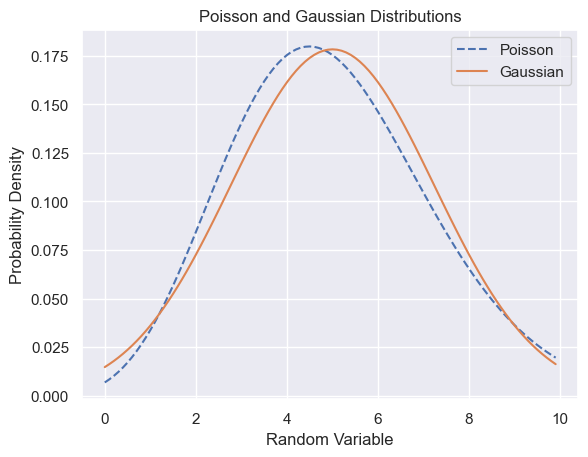

In [30]:
#Poission distribution
x = np.arange(0, 10, 0.1)
dist_poisson = stats.poisson(mu = 5)
plt.plot(x, dist_poisson.pmf(x),linestyle = '--')
#Gaussian distribution
# dist_norm = stats.norm(5,np.sqrt(5))
plt.plot(x, stats.norm.pdf(x , 5 , 5 ** 0.5),linestyle = '-')
plt.legend(['Poisson','Gaussian'])
plt.title("Poisson and Gaussian Distributions")
plt.xlabel("Random Variable")
plt.ylabel("Probability Density")
plt.show()


## Q4.

In [19]:
import pandas as pd

In [20]:
data = [{0.8920,0.00044},{0.881,0.009},{0.8913,0.00032},{0.9837,0.00048},{0.8958,0.00045}]
cols = ['x','err']

In [21]:
df = pd.DataFrame(data, columns=cols)

In [22]:
df

,x,err
0,0.8920,0.00044
1,0.8810,0.00900
2,0.8913,0.00032
3,0.9837,0.00048
4,0.8958,0.00045


In [23]:
#calculating mean
df['num'] = df['x']/ df['err']**2
df['den'] = 1/df['err']**2

#mean
mean = df['num'].sum()/df['den'].sum()
sd = np.sqrt(1/df['den'].sum())

In [24]:
print('Mean is: ', mean)
print('Standard deviation is: ', sd)

Mean is:  0.9089185199574897
Standard deviation is:  0.00020318737026848627


## Q5.

In [31]:
df = pd.read_csv('exoplanet.eu_catalog.csv')
eccentricity = df['eccentricity'].dropna()


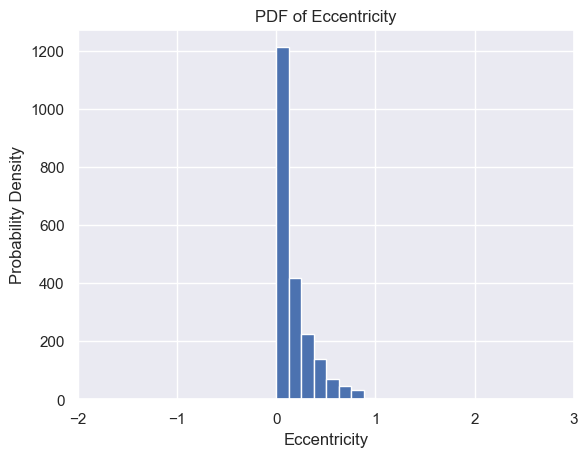

In [36]:
#histogram of eccentricity
plt.hist(eccentricity,bins=25)
plt.xlim(-2,3)
plt.title("PDF of Eccentricity")
plt.xlabel("Eccentricity")
plt.ylabel("Probability Density")
plt.show()

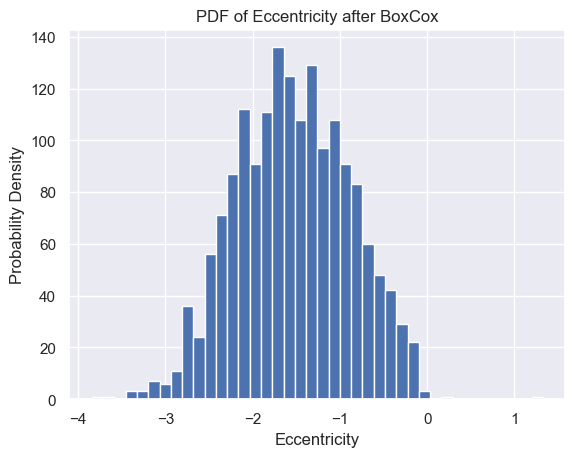

In [38]:
#Gaussianizing the data using BoxCox
boxcoxdata = eccentricity[eccentricity>0]
eccentricity_bc, lmbda = stats.boxcox(boxcoxdata)
#plotting the histogram of the gaussianized data
plt.hist(eccentricity_bc,bins=40)
plt.title("PDF of Eccentricity after BoxCox")
plt.xlabel("Eccentricity")
plt.ylabel("Probability Density")
plt.show()
# plt.hist(eccentricity_bc,bins=25)
# plt.show()